## 1. **How many multiplications and additions do you need to perform a matrix multiplication between a (n, k) and (k, m) matrix? Explain.**

Matrix multiplication involves the dot product of rows from the first matrix with columns from the second matrix. To compute the resulting matrix C of dimensions (n, m) from matrices A (dimension: n x k) and B (dimension: k x m), each element $c_{ij}$ in the resulting matrix C requires k multiplications and k - 1 additions. 

* To compute $c_{ij}$, you need to take the dot product of the ith row of matrix A and the jth column of matrix B.* This involves multiplying each element of the row vector from matrix A by the corresponding element in the column vector from matrix B (which totals k multiplication because there are k elements in the row and column vectors each)
* After multiplying corresponding elements, these products are added together to get the final value of $c_{ij}$. Since there are k products and require k-1 additions to sum them up, we get k-1 additions per $c_{ij}$ in the resulting matrix.

For the entire matrix C, which has number of elements = n x m, the total number of operations is:

Total number of additions: $n \times m \times k-1$

Total number of multiplications: n  x m x k.

## 2. **Write Python code to multiply the above two matrices. Solve using list of lists and then use numpy. Compare the timing of both solutions. Which one is faster? Why?**

In [1]:
%%timeit
# using list of lists
# len of a = (n, k), len of b = (k, m)

mat = [[]]

def mult(a, b):
    n = len(a) # no. of rows = 3
    k = len(a[0]) # no. of cols = 2
    m = len(b[0]) # no. of cols = 4
    mat = [[] for _ in range (n)]
    c_ij = 0
    for i in range(n):
        for j in range(m):
            for l in range(k):
                c_ij += a[i][l] * b[l][j]
            mat[i].append(c_ij)
            c_ij = 0
    return mat

a = [[1, 2],
     [3, 4],
     [5, 6]]
b = [[1, 2, 3, 4],
     [5, 6, 7, 8]]

res = mult(a, b)

3.16 µs ± 163 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [8]:
%%timeit
import numpy as np

# using numpy for small matrices
a = np.array([[1, 2],
             [3, 4],
             [5, 6]])
b = np.array([[1, 2, 3, 4],
             [5, 6, 7, 8]])
res = np.dot(a, b)

2.85 µs ± 74.3 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


Python is dynamically typed, meaning that any type of data (float, str, int, etc.) can be put into a list without explicitly declaring the type of the data. But this flexibility comes at a cost: to allow these flexible types, each item in the list must contain its own type info, reference count, and other information – that is, each item is a complete Python object. In the special case that all variables are of the same type, much of this information is redundant: it can be much more efficient to store data in a fixed-type array. This difference between a dynamic-type list and a fixed-type (NumPy-style) array makes NumPy faster for operations on arrays.

## 3. **Finding the highest element in a list requires one pass of the array. Finding the second highest element requires 2 passes of the the array. Using this method, what is the time complexity of finding the median of the array? Can you suggest a better method? Can you implement both these methods in Python and compare against numpy.median routine in terms of time?**

Time complexity of finding median: O(n^2). This is because one pass takes O(n) time. The number of passes is at least n/2. This makes the time complexity equal to n * n/2 = O(n^2)

Better method: Sort the array using an algorithm that takes O(nlogn) time. If the length of the array is even, take the mean of the (n/2)th and (n/2 + 1)th elements. If the length of the array is odd, take the ((n+1)/2)th element.

Time complexity: O(nlogn). This is because the complexity of sorting is equal to O(nlogn) and the complexity of indexing from the array and consequent arithmetic (if any) is equal to O(1). This makes the time complexity equal to O(nlogn) + O(1) = O(nlogn)

The most time is taken by the numpy.median routine. For smaller arrays, the overhead of using numpy.median() might make it slightly slower compared to a straightforward linear pass or sorting with a custom implementation. Also, numpy.median() involves more function calls and potential overhead related to the NumPy library, leading to slightly longer execution times compared to direct linear traversal or a custom implementation of finding the median.

In [16]:
%%timeit 

array = [5, 3, 8, 2, 1, 7, 4, 6]
num_passes = (len(array)//2 + 1) 

max = array[0]
for i in range(num_passes):
    maxes = array[0]
    for j in range(len(array)):
        if i == 0: # if it is the first pass, dont compare and just find the max
            if max <= array[j]:
                max = array[j]
        else:
            if maxes <= array[j] and array[j] < max:
                maxes = array[j]
    if i!=0: 
        max_prev = max
        max = maxes

if len(array) % 2 != 0:
    median = max
else:
    median = (max_prev + max) / 2

8.82 µs ± 186 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [9]:
def find_median_sorting(arr):
    sorted_arr = sorted(arr)
    n = len(sorted_arr)
    if n % 2 == 0:
        return (sorted_arr[n // 2 - 1] + sorted_arr[n // 2]) / 2
    else:
        return sorted_arr[n // 2]

array = [5, 3, 8, 2, 1, 7, 4, 6]
%timeit median = find_median_sorting(array)

1 µs ± 3.49 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)


In [18]:
import numpy as np

arr = np.array([5, 3, 8, 2, 1, 7, 4, 6])
%timeit median = np.median(arr)

29.7 µs ± 668 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


## 4. **What is the gradient of the following function with respect to x and y?**
## $$x^2 \cdot y + y^3 \cdot \sin(x)$$


The formula for gradient of F(x, y) is $$\nabla f(x, y) = \frac{\partial f}{\partial x} \mathbf{i} + \frac{\partial f}{\partial y} \mathbf{j}$$
Using this, we get the gradient of the given function as $$\mathbf{i} \hat{} (2xy + y^3 \cdot \cos(x)) + \mathbf{j} \hat{} (x^2 + 3y^2 \cdot \sin(x))$$


## 5. **Use JAX to confirm the gradient evaluated by your method matches the analytical solution corresponding to a few random values of x and y.**

In [23]:
import jax
import jax.numpy as jnp

def f(x, y):
    return x**2 * y + y**3 * jnp.sin(x)

x1 = 0.0
y1 = 2.0
grad1 = jax.grad(f, (0, 1))(x1, y1)
print("Gradient at x = 0, y = 2:", grad1[0], "i-hat +", grad1[1], "j-hat")

x2 = jnp.pi / 2
y2 = 0.0
grad2 = jax.grad(f, (0, 1))(x2, y2)
print("Gradient at x = pi/2, y = 0:", grad2[0], "i-hat +", grad2[1], "j-hat")

x3 = jnp.pi
y3 = jnp.pi
grad3 = jax.grad(f, (0, 1))(x3, y3)
print("Gradient at x = pi, y = pi:", grad3[0], "i-hat +", grad3[1], "j-hat")

Gradient at x = 0, y = 2: 8.0 i-hat + 0.0 j-hat
Gradient at x = pi/2, y = 0: 0.0 i-hat + 2.4674013 j-hat
Gradient at x = pi, y = pi: -11.267069 i-hat + 9.869602 j-hat


## 6. **Use sympy to confirm that you obtain the same gradient analytically.**

In [21]:
from sympy import *
x, y, z = symbols('x y z')

i_hat = diff(x**2 * y + y**3 * sin(x), x)
j_hat = diff(x**2 * y + y**3 * sin(x), y)

print("x-component of gradient: ", i_hat)
print("y-component of gradient: ", j_hat)

x-component of gradient:  2*x*y + y**3*cos(x)
y-component of gradient:  x**2 + 3*y**2*sin(x)


## 7. **Create a Python nested dictionary to represent hierarchical information. We want to store record of students and their marks.**

In [3]:
dictionary = {
    2022: {
        "Branch 1": {
            "Roll Number" : 22110001,
            "Name": "AB",
            "Marks": {
                "Maths": 100,
                "English": 70}
            }
        },
    2023: {
        "Branch 1",
        "Branch 2"},
    2024: {
        "Branch 1",
        "Branch 2"},
    2025: {
        "Branch 1",
        "Branch 2"}
}

## 8. **Store the same information using Python classes. We have an overall database which is a list of year objects. Each year contains a list of branches. Each branch contains a list of students. Each student has some properties like name, roll number and has marks in some subjects.**

In [32]:
class Student:
    def __init__(self, roll_number, name, marks):
        self.roll_number = roll_number
        self.name = name
        self.marks = marks

class Branch:
    def __init__(self):
        self.students = []

class Year:
    def __init__(self, year):
        self.year = year
        self.branches = []
    def add_branch(self, branch):
        self.branches.extend([branch])

database = []

year_2022 = Year(2022)

branch1_2022 = Branch()
AB = Student(1, "AB", {"Math":70, "English":90})
branch1_2022.students.append(AB)
BC = Student(2, "BC", {"Math":80, "English":60})
branch1_2022.students.append(BC)
year_2022.add_branch(branch1_2022)

branch2_2022 = Branch()
CD = Student(3, "CD", {"History":90, "Philosophy":40})
branch2_2022.students.append(CD)
DE = Student(4, "DE", {"History":50, "Philosophy":30})
branch2_2022.students.append(DE)
year_2022.add_branch(branch2_2022)

year_2023 = Year(2023)

branch1_2023 = Branch()
XY = Student(1, "XY", {"Math":60, "English":90})
branch1_2023.students.append(XY)
YZ = Student(3, "YZ", {"Math":80, "English":100})
branch1_2023.students.append(BC)
year_2023.add_branch(branch1_2023)

branch2_2023 = Branch()
MN = Student(2, "MN", {"History":60, "Philosophy":20})
branch2_2023.students.append(MN)
UV = Student(4, "UV", {"History":90, "Philosophy":80})
branch2_2023.students.append(UV)
year_2023.add_branch(branch2_2023)

year_2024 = Year(2024)
branch1_2024 = Branch()
branch2_2024 = Branch()
year_2024.add_branch([branch1_2024, branch2_2024])

year_2025 = Year(2025)
branch1_2025 = Branch()
branch2_2025 = Branch()
year_2025.add_branch([branch1_2025, branch2_2025])

database.extend([year_2022, year_2023, year_2024, year_2025])

## 9. **Using matplotlib plot the following functions on the domain: x = 0.5 to 100.0 in steps of 0.5.**

1. $$y = x$$

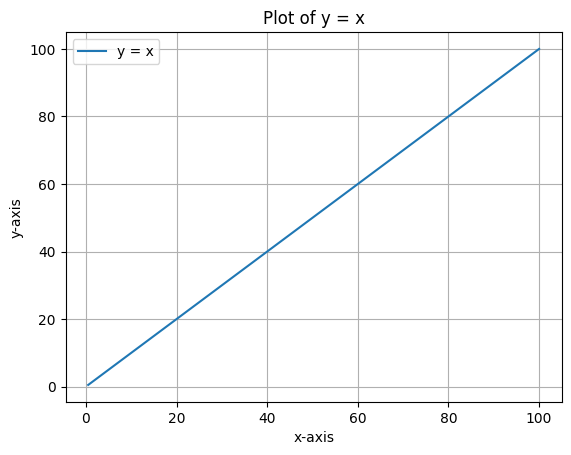

In [7]:
import matplotlib.pyplot as plt
import numpy as np

def f(x):
    return x

x_vals = np.arange(0.5, 100.5, 0.5)
y_vals = f(x_vals)

plt.figure()
plt.plot(x_vals, y_vals, label = 'y = x')
plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.title('Plot of y = x')
plt.legend()
plt.grid()
plt.show()

2. $$y = x^2$$


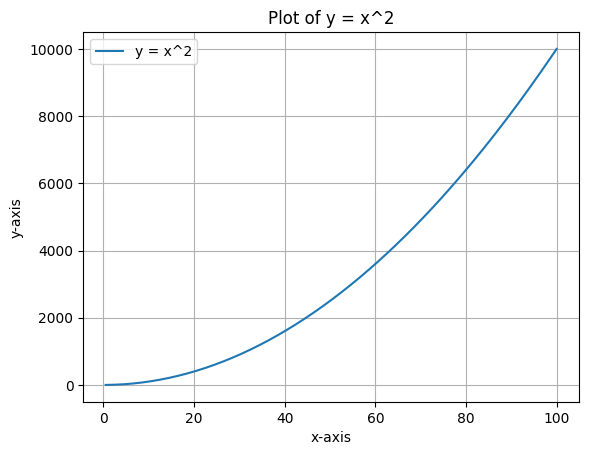

In [35]:
import matplotlib.pyplot as plt
import numpy as np

def f(x):
    return x**2

x_vals = np.arange(0.5, 100.5, 0.5)
y_vals = f(x_vals)

plt.figure()
plt.plot(x_vals, y_vals, label = 'y = x^2')
plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.title('Plot of y = x^2')
plt.legend()
plt.grid()
plt.show()

3. $$y = x^3/100$$

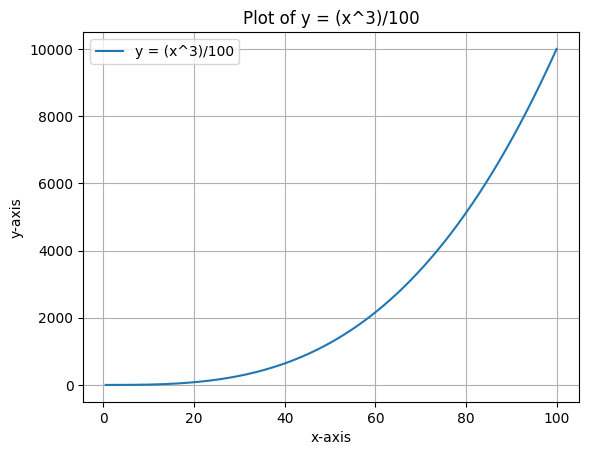

In [11]:
import matplotlib.pyplot as plt
import numpy as np

def f(x):
    return (x**3)/100

x_vals = np.arange(0.5, 100.5, 0.5)
y_vals = f(x_vals)

plt.figure()
plt.plot(x_vals, y_vals, label = 'y = (x^3)/100')
plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.title('Plot of y = (x^3)/100')
plt.legend()
plt.grid()
plt.show()

4. $$y = sin(x)$$

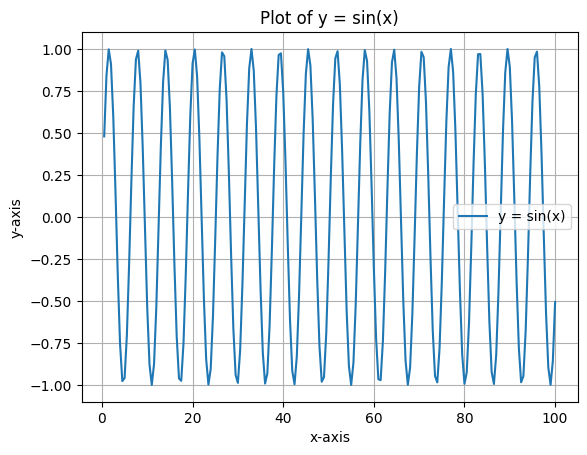

In [12]:
import matplotlib.pyplot as plt
import numpy as np

def f(x):
    return np.sin(x)

x_vals = np.arange(0.5, 100.5, 0.5)
y_vals = f(x_vals)

plt.figure()
plt.plot(x_vals, y_vals, label = 'y = sin(x)')
plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.title('Plot of y = sin(x)')
plt.legend()
plt.grid()
plt.show()

5. $$y = sin(x)/x$$

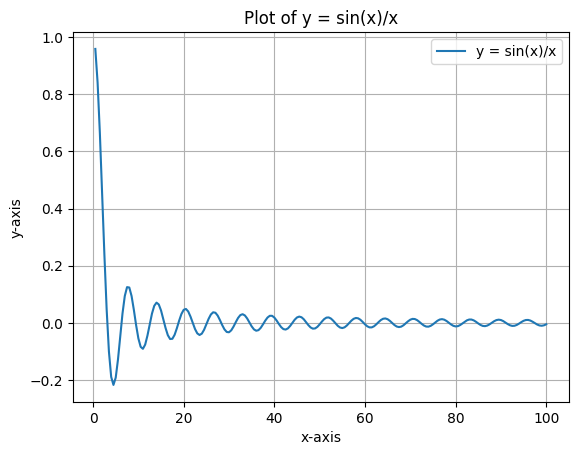

In [13]:
import matplotlib.pyplot as plt
import numpy as np

def f(x):
    return (np.sin(x))/x

x_vals = np.arange(0.5, 100.5, 0.5)
y_vals = f(x_vals)

plt.figure()
plt.plot(x_vals, y_vals, label = 'y = sin(x)/x')
plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.title('Plot of y = sin(x)/x')
plt.legend()
plt.grid()
plt.show()

6. $$y = log(x)$$

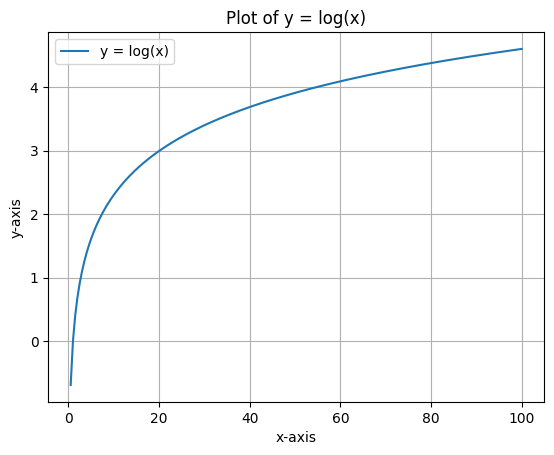

In [14]:
import matplotlib.pyplot as plt
import numpy as np

def f(x):
    return np.log(x)

x_vals = np.arange(0.5, 100.5, 0.5)
y_vals = f(x_vals)

plt.figure()
plt.plot(x_vals, y_vals, label = 'y = log(x)')
plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.title('Plot of y = log(x)')
plt.legend()
plt.grid()
plt.show()

7. $$y = e^x$$

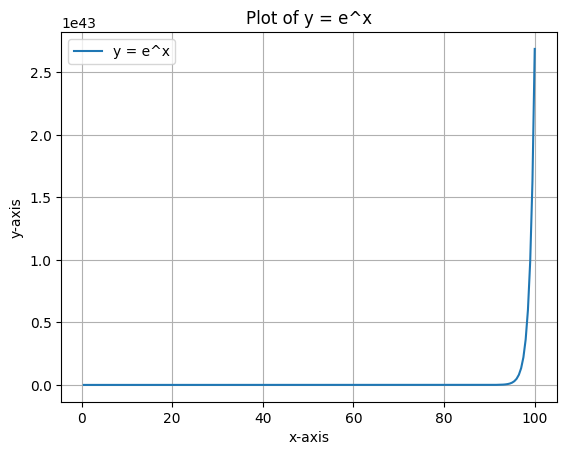

In [15]:
import matplotlib.pyplot as plt
import numpy as np

def f(x):
    return np.exp(x)

x_vals = np.arange(0.5, 100.5, 0.5)
y_vals = f(x_vals)

plt.figure()
plt.plot(x_vals, y_vals, label = 'y = e^x')
plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.title('Plot of y = e^x')
plt.legend()
plt.grid()
plt.show()

## 10. **Using numpy generate a matrix of size 20X5 containing random numbers drawn uniformly from the range of 1 to 2. Using Pandas create a dataframe out of this matrix. Name the columns of the dataframe as “a”, “b”, “c”, “d”, “e”. Find the column with the highest standard deviation. Find the row with the lowest mean.**

In [38]:
import numpy as np
import pandas as pd

matrix = np.random.random((20, 5)) + 1

columns = ['a', 'b', 'c', 'd', 'e']
df = pd.DataFrame(matrix, columns = columns)

std_all_cols = df.std()
col = std_all_cols.idxmax()
dev = std_all_cols.max()
print(f"Column with highest std: {col}, highest std: {dev}")

mean_all_rows = df.mean(axis = 1)
row = mean_all_rows.idxmin()
min = mean_all_rows.min()
print(f"Row with lowest mean: {row}, lowest mean: {min}")

Column with highest std: b, highest std: 0.3378605300327973
Row with lowest mean: 11, lowest mean: 1.2493850241012652


## 11. **Add a new column to the dataframe called “f” which is the sum of the columns “a”, “b”, “c”, “d”, “e”. Create another column called “g”. The value in the column “g” should be “LT8” if the value in the column “f” is less than 8 and “GT8” otherwise. Find the number of rows in the dataframe where the value in the column “g” is “LT8”. Find the standard deviation of the column “f” for the rows where the value in the column “g” is “LT8” and “GT8” respectively.**

In [41]:
df['f'] = df['a'] + df['b'] + df['c'] + df['d'] + df['e']

df['g'] = np.where(df['f'] < 8, 'LT8', 'GT8')

LT8_num = len(df[df['g'] == 'LT8'])
print("Number of rows where value in 'g' is 'LT8':", LT8_num)

print("Std of f for rows where g = LT8: ", df.groupby('g')[['f']].std().iloc[1])
print("Std of f for rows where g = GT8: ", df.groupby('g')[['f']].std().iloc[0])

Number of rows where value in 'g' is 'LT8': 17
Std of f for rows where g = LT8:  f    0.463406
Name: LT8, dtype: float64
Std of f for rows where g = GT8:  f    0.244441
Name: GT8, dtype: float64


## 12. **Write a small piece of code to explain broadcasting in numpy.**

Broadcasting allows different types of binary operations (addition, multiplication, etc,) to be performed on arrays of different sizes. 

For example, a scalar can be added to an array. For a vector, we get the following result:

In [42]:
a = np.array([1, 2, 3])
a = a+5
print(a)

[6 7 8]


For a matrix, we can broadcast a vector or a scalar to the matrix. 

In [49]:
# Broadcasting a vector
m = np.ones((3, 3))
print("Original vector: ")
print(m)

print("Horizontal vector: ", a)

print("Broadcasting a vector horizontally: ")
print(m+a)

b = np.array([1, 2, 3]).reshape(3, 1)
print("Vertical vector: ")
print(b)
print("Broadcasting a vector vertically: ")
print(m+b)

Original vector: 
[[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]]
Horizontal vector:  [6 7 8]
Broadcasting a vector horizontally: 
[[7. 8. 9.]
 [7. 8. 9.]
 [7. 8. 9.]]
Vertical vector: 
[[1]
 [2]
 [3]]
Broadcasting a vector vertically: 
[[2. 2. 2.]
 [3. 3. 3.]
 [4. 4. 4.]]


In [50]:
# Broadcasting a scalar
print(m-1)

[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]


Here the one-dimensional array a and b 'stretched', or broadcast across the second dimension in order to match the shape of m. 

We can also broadcast a scalar to a matrix. Here, the scalar value 1 is subtracted from each element in the matrix m. Even though m is a 2D array and 1 is a scalar (0D array), broadcasting allows the scalar value to be extended implicitly to match the shape of m, performing the operation element-wise.

## 13. **Write a function to compute the argmin of a numpy array. The function should take a numpy array as input and return the index of the minimum element. You can use the np.argmin function to verify your solution.**

In [52]:
array = np.array([[2, 3], [-5, 6]])

def find_argmin(array, shape):
    if len(shape) > 1:
        flat_array = array.flatten()
    else:
        flat_array = array
        
    new_shape = sum(shape)
        
    min = flat_array[0]
    for i in range(new_shape):
        if flat_array[i] <= min:
            min = flat_array[i]
            ind = i
    return min, ind

print("Argmin using function: ", find_argmin(array, array.shape)[1])

Argmin using function:  2


In [53]:
a = np.array([[2, 3], [-5, 6]])
print("Argmin using numpy: ", np.argmin(a))

Argmin using numpy:  2
